## Yeowoone nailshape U-Net For Fingernails Segmentation

BeautyID

In [1]:
#!pip install matplotlib
#!pip install sklearn
#!pip install --upgrade tensorflow==1.13.2
#!pip install --upgrade keras==2.3.1
#!pip install --upgrade keras-applications==1.0.6
#!pip install --upgrade keras-preprocessing==1.0.5

%matplotlib inline
from utils_nails import *
#from utils_nails import fingernailseg

Using TensorFlow backend.
/Users/anthonypark/anaconda3/envs/nailshape/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/anthonypark/anaconda3/envs/nailshape/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/anthonypark/anaconda3/envs/nailshape/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

### Initialization

Instructions for updating:
Colocations handled automatically by placer.


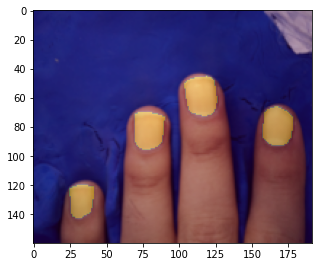

In [2]:
# initialize instance
dataset = 'nails.tar.gz'
seg = fingernailseg(dataset)
# show random example from training set
seg.plot_example(np.random.randint(seg.X_train.__len__()))
# create U-Net model
seg.create_unet()

### Training

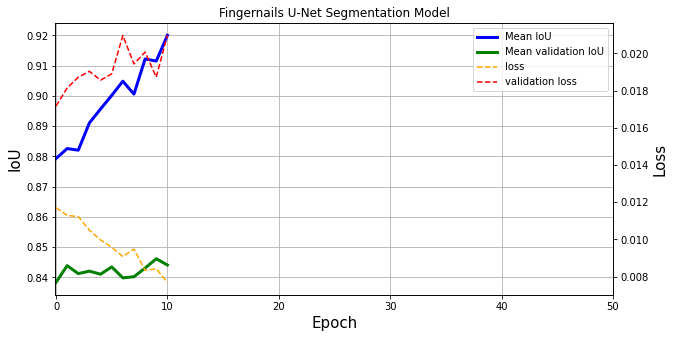

Epoch 00011: early stopping


In [5]:
seg.fit()
seg.load_model()

# TEST

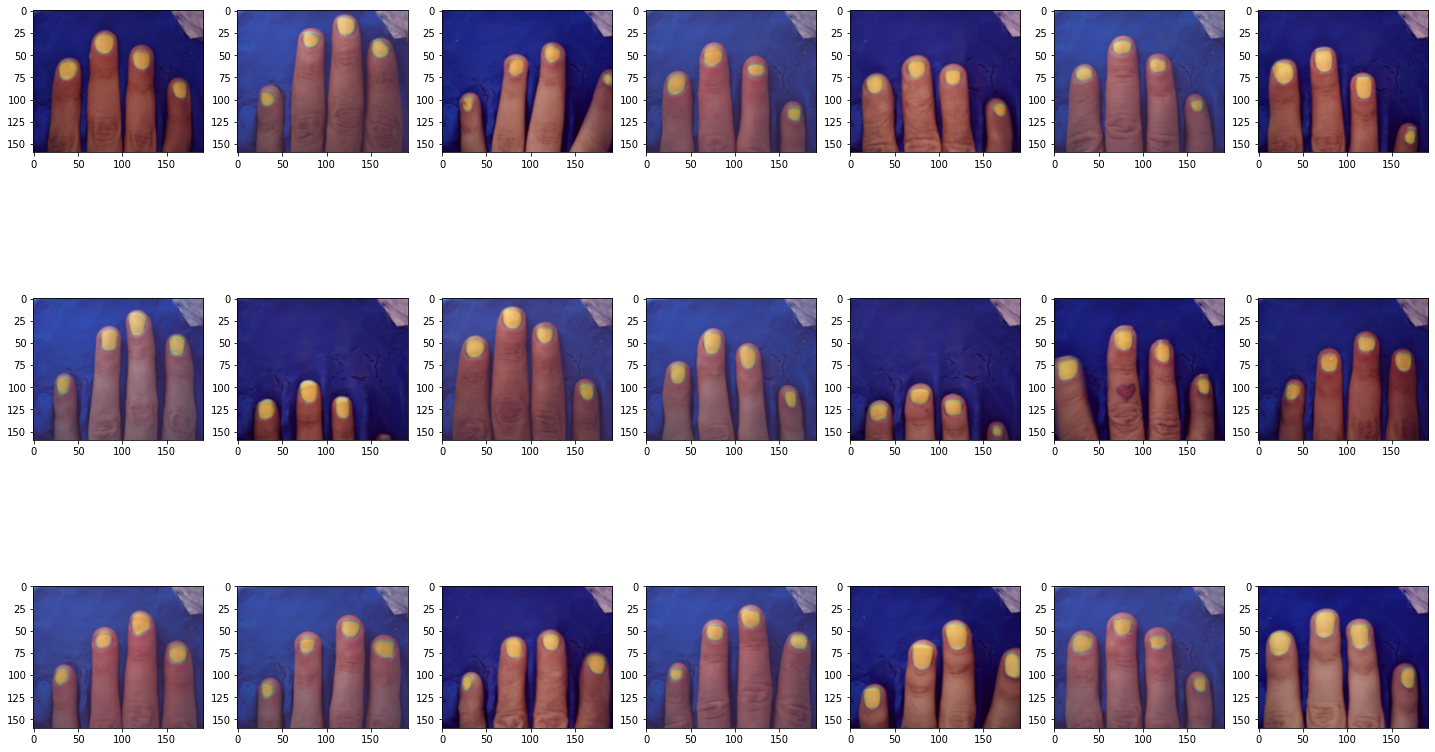

In [4]:
mask = seg.predict()
raw = seg.X_test
plt.figure(figsize=(25,15))
for i in range(len(mask)):
    plt.subplot(3, 7, i+1)
    plt.imshow(raw[i])
    plt.imshow(mask[i,:,:,0], alpha=0.3)

Text(0.5, 1.0, 'Fingernails segmentation of test image')

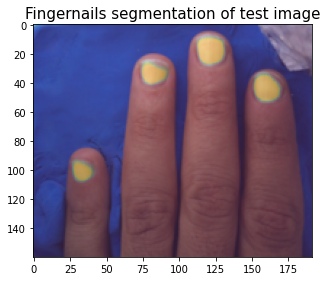

In [6]:
mask = seg.predict()
plt.figure(figsize=(5,5))

rand_image = np.random.randint(seg.X_test.__len__())
plt.imshow(raw[rand_image,:,:,:])
plt.imshow(mask[rand_image,:,:,0], alpha=0.3)
plt.title('Fingernails segmentation of test image', fontsize=15)